In [2]:
library(tibble)
library(tidyverse)
library(plotly)
library(latex2exp)

# EXERCISE 1

[1] "----------------------------------------"
[1] "Analytical values for the uniform prior:"
[1] "----------------------------------------"


[1] "Mean = 2.600000"

[1] "Variance = 0.520000"

[1] "---------------------------------------"
[1] "Numerical values for the uniform prior:"
[1] "---------------------------------------"


[1] "Mean = 2.597403"

[1] "Median = 2.533646"

[1] "Variance = 0.526227"


[1] "------------------------------------------"
[1] "Analytical values for the Jeffrey's prior:"
[1] "------------------------------------------"


[1] "Mean = 2.500000"

[1] "Variance = 0.500000"

[1] "-----------------------------------------"
[1] "Numerical values for the Jeffrey's prior:"
[1] "-----------------------------------------"


[1] "Mean = 2.497502"

[1] "Median = 2.433659"

[1] "Variance = 0.505738"

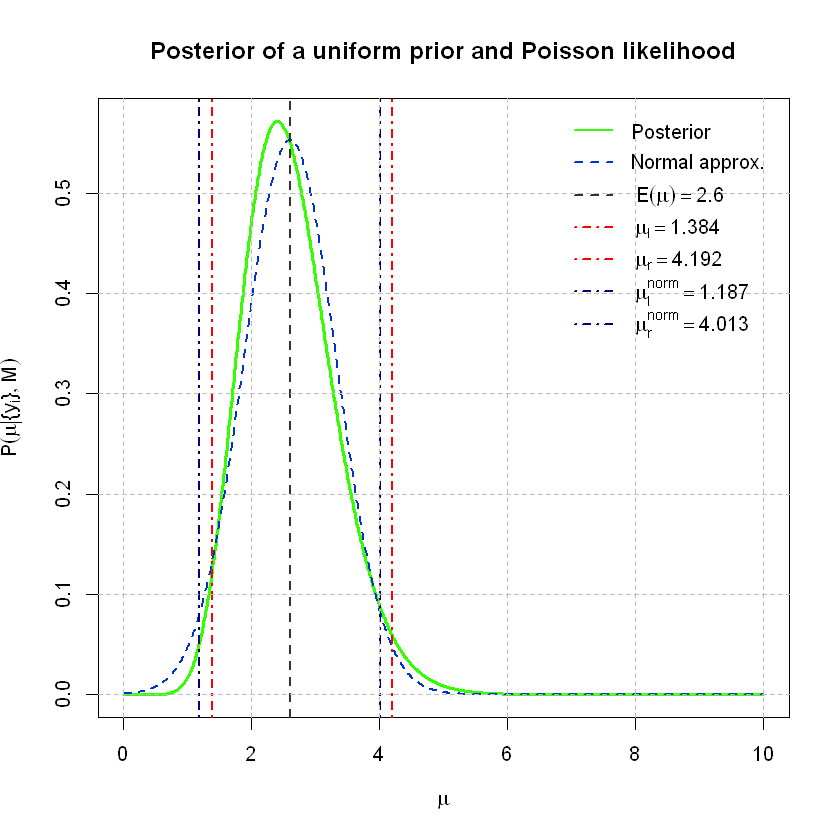

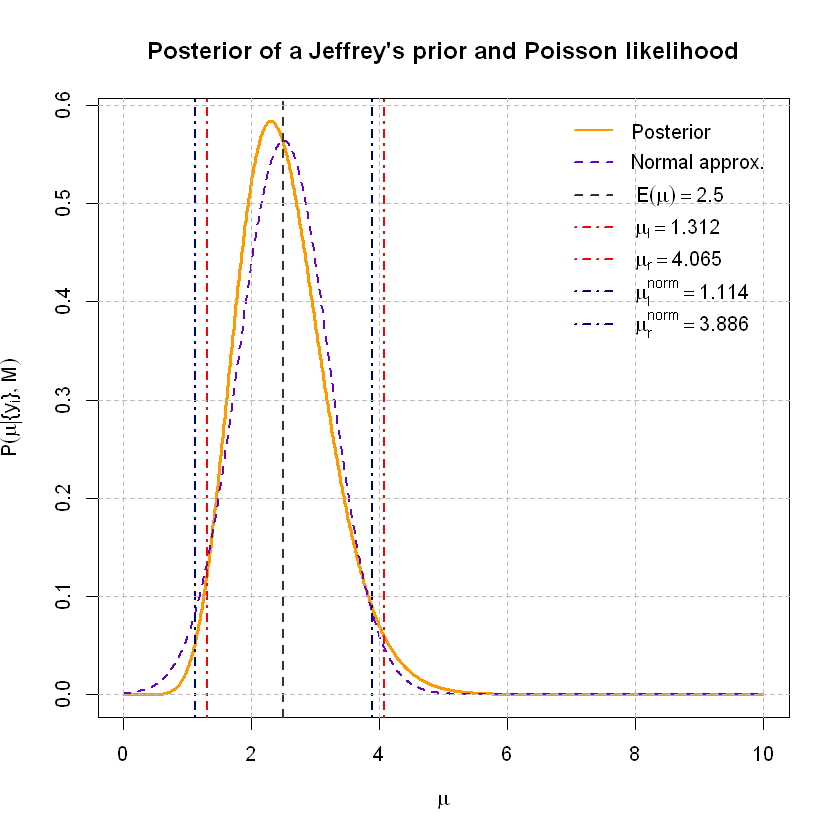

In [3]:
D_t <- 10 #Time step
y <- c(4, 1, 3, 1, 3) #Observed particles at each time step

#The likelihood, thus the distribution of the measurements assuming that the parameter mu and the model are known, follows a Poisson distribution. 
#Since we have multiple independent measurements, we must consider the product of the likelihoods associated to each single measurement. This is similar to a Gamma function with parameters alpha, lambda and a normalization factor given by:
alpha_unif <- sum(y) + 1
lambda_unif <- length(y)
k <- (lambda_unif^alpha_unif) / gamma(alpha_unif)

#Assuming a uniform (improper) prior distribution for parameter mu, the posterior becomes a Gamma function with parameters alpha and lambda
mu_min <- 0
mu_max <- 10
mu <- seq(mu_min, mu_max, 0.01)

post_unif <- dgamma(mu, shape = alpha_unif, rate = lambda_unif)

#Mean and variance: analytical values
mean_unif_th <- alpha_unif / lambda_unif
Var_unif_th <- alpha_unif / (lambda_unif^2)

print("----------------------------------------")
print("Analytical values for the uniform prior:")
print("----------------------------------------")
sprintf("Mean = %f", mean_unif_th)
sprintf("Variance = %f", Var_unif_th)

#Mean, median and variance: numerical values
d_mu <- (mu_max - mu_min) / length(mu)
mean_unif_nu <- d_mu * sum(mu * post_unif)
median_unif_nu <- qgamma(0.5, shape = alpha_unif, rate = lambda_unif)
Var_unif_nu <- (d_mu * sum(mu*mu*post_unif)) - (mean_unif_nu^2)
print("---------------------------------------")
print("Numerical values for the uniform prior:")
print("---------------------------------------")
sprintf("Mean = %f", mean_unif_nu)
sprintf("Median = %f", median_unif_nu)
sprintf("Variance = %f", Var_unif_nu)
cat("\n")

#Credibility intervals
ci <- 0.95
ci_l <- (1 - ci) / 2
ci_r <- 1 - ci_l

mu_l_unif <- qgamma(ci_l, shape = alpha_unif, rate = lambda_unif)
mu_r_unif <- qgamma(ci_r, shape = alpha_unif, rate = lambda_unif)

#Credibility intervals, normal approximation
norm_approx_unif <- dnorm(mu, mean = mean_unif_th, sd = sqrt(Var_unif_th))

mu_l_norm_unif <- qnorm(ci_l, mean = mean_unif_th, sd = sqrt(Var_unif_th))
mu_r_norm_unif <- qnorm(ci_r, mean = mean_unif_th, sd = sqrt(Var_unif_th))




#Assuming a Jeffrey's (improper) prior distribution for parameter mu, the posterior becomes a Gamma function with parameters alpha and lambda given by:
alpha_jeff <- sum(y) + 0.5
lambda_jeff <- length(y)

post_jeff <- dgamma(mu, shape = alpha_jeff, rate = lambda_jeff)

#Mean and variance: analytical values
mean_jeff_th <- alpha_jeff / lambda_jeff
Var_jeff_th <- alpha_jeff / (lambda_jeff^2)

print("------------------------------------------")
print("Analytical values for the Jeffrey's prior:")
print("------------------------------------------")
sprintf("Mean = %f", mean_jeff_th)
sprintf("Variance = %f", Var_jeff_th)

#Mean, median and variance: numerical values
mean_jeff_nu <- d_mu * sum(mu * post_jeff)
median_jeff_nu <- qgamma(0.5, shape = alpha_jeff, rate = lambda_jeff)
Var_jeff_nu <- (d_mu * sum(mu*mu*post_jeff)) - (mean_jeff_nu^2)
print("-----------------------------------------")
print("Numerical values for the Jeffrey's prior:")
print("-----------------------------------------")
sprintf("Mean = %f", mean_jeff_nu)
sprintf("Median = %f", median_jeff_nu)
sprintf("Variance = %f", Var_jeff_nu)

#Credibility intervals
mu_l_jeff <- qgamma(ci_l, shape = alpha_jeff, rate = lambda_jeff)
mu_r_jeff <- qgamma(ci_r, shape = alpha_jeff, rate = lambda_jeff)

#Credibility intervals, normal approximation
norm_approx_jeff <- dnorm(mu, mean = mean_jeff_th, sd = sqrt(Var_jeff_th))

mu_l_norm_jeff <- qnorm(ci_l, mean = mean_jeff_th, sd = sqrt(Var_jeff_th))
mu_r_norm_jeff <- qnorm(ci_r, mean = mean_jeff_th, sd = sqrt(Var_jeff_th))




#Plots
plot(mu, post_unif, xlab = TeX("$\\mu$"), 
     ylab = TeX("$P(\\mu | \\{ y_i \\}, M)$"), type = "l", lty = 1,
     main = "Posterior of a uniform prior and Poisson likelihood", lwd = 3, 
     col = "#33FF00")
lines(mu, norm_approx_unif, lty = 2, lwd = 2, col = "#0033CC")
abline(v = mean_unif_th, col = '#333333', lty=2, lwd=2)
abline(v = mu_l_unif, col = 'red', lty=4, lwd=2)
abline(v = mu_r_unif, col = 'red', lty=4, lwd=2)
abline(v = mu_l_norm_unif, col = 'navy', lty=4, lwd=2)
abline(v = mu_r_norm_unif, col = 'navy', lty=4, lwd=2)
grid(nx = NULL, ny = NULL, lty = 2, col = "gray", lwd = 1)
legend('topright', col=c("#33FF00", "#0033CC", "#333333", "red", "red",  "navy", "navy"), 
       lty=c(1, 2, 2, 4, 4, 4, 4), bty='n', cex=1., lwd=2,
       legend = c("Posterior",
                  "Normal approx.",
                  parse(text = paste0(' ~E(mu) == ', round(mean_unif_th, 3))),
                  parse(text = paste0(' ~mu[l] == ', round(mu_l_unif, 3))),
                  parse(text = paste0(' ~mu[r] == ', round(mu_r_unif, 3))),
                  parse(text = paste0(' ~mu[l]^norm == ', round(mu_l_norm_unif, 3))),
                  parse(text = paste0(' ~mu[r]^norm == ', round(mu_r_norm_unif, 3))))
         )

plot(mu, post_jeff, xlab = TeX("$\\mu$"), 
     ylab = TeX("$P(\\mu | \\{ y_i \\}, M)$"), type = "l", lty = 1,
     main = "Posterior of a Jeffrey's prior and Poisson likelihood", lwd = 3,
     col = "#FF9900")
lines(mu, norm_approx_jeff, lty = 2, lwd = 2, col = "#6600CC")
abline(v = mean_jeff_th, col = '#333333', lty=2, lwd=2)
abline(v = mu_l_jeff, col = 'red', lty=4, lwd=2)
abline(v = mu_r_jeff, col = 'red', lty=4, lwd=2)
abline(v = mu_l_norm_jeff, col = 'navy', lty=4, lwd=2)
abline(v = mu_r_norm_jeff, col = 'navy', lty=4, lwd=2)
grid(nx = NULL, ny = NULL, lty = 2, col = "gray", lwd = 1)
legend('topright', col=c("#FF9900", "#6600CC", "#333333", "red", "red",  "navy", "navy"), 
       lty=c(1, 2, 2, 4, 4, 4, 4), bty='n', cex=1., lwd=2,
       legend = c("Posterior",
                  "Normal approx.",
                  parse(text = paste0(' ~E(mu) == ', round(mean_jeff_th, 3))),
                  parse(text = paste0(' ~mu[l] == ', round(mu_l_jeff, 3))),
                  parse(text = paste0(' ~mu[r] == ', round(mu_r_jeff, 3))),
                  parse(text = paste0(' ~mu[l]^norm == ', round(mu_l_norm_jeff, 3))),
                  parse(text = paste0(' ~mu[r]^norm == ', round(mu_r_norm_jeff, 3))))
         )

# EXERCISE 2

[1] "--------------------------------"
[1] "True position of the lighthouse:"
[1] "--------------------------------"


[1] "alpha = -5.342393"

[1] "beta = 4.154169"

[1] "-------------------------------------------------"
[1] "Position of the lighthouse estimated numerically:"
[1] "-------------------------------------------------"


[1] "alpha = -5.393939"

[1] "beta = 4.242424"

Warning message in persp.default(alpha_p, beta_p, L, zlim = c(-7000, max(L) + 100), :
"surface extends beyond the box"

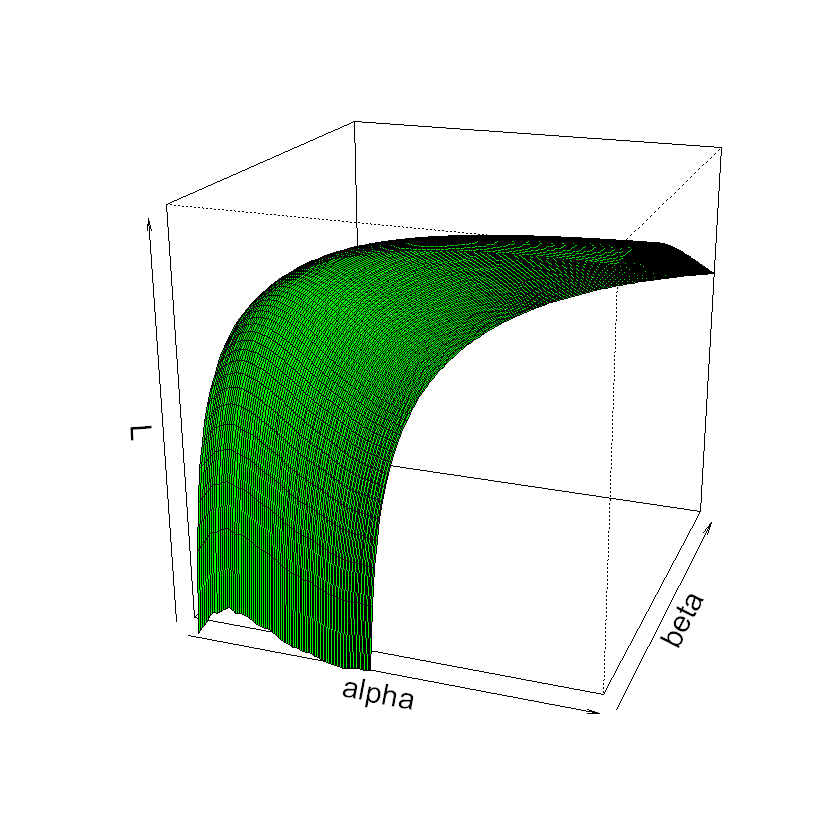

In [4]:
#In order to study this problem, we refer to what was told during the lectures in class, operating some modifications where necessary. 
#To make inference on parameters alpha and beta, we start from the usual Bayes theorem: 

#P(alpha, beta | D) ~ P(D | alpha, beta) * P(alpha, beta)

#Assuming alpha and beta to be independent parameters one from the other (which is reasonable, because for construction of the problem, one of them do not provide information on the other), the joint prior P(alpha, beta) can be expressed as the product of two priors, one associated to alpha and the other to beta, in their respective domains. Moreover, since we do not have any information on the possible distribution of the parameters, we assume both independent priors to be uniform:

#P(alpha, beta) = P(alpha) * P(beta) = 1/(alpha_max - alpha_min) * 1/(beta_max - beta_min) when x belong to the intersection of [alpha_min, alpha_max] and [beta_min, beta_max] and
#P(alpha, beta) = P(alpha) * P(beta) = 0 otherwise

#After changing variable from the angle of light emission, theta, to the position of detection of a light pulse along the shore, x, using the relation: x = alpha + beta*tan(theta), we can express the likelihood as:

#P(x | alpha, beta) = 1/pi * beta/(beta^2 + (x - alpha)^2)

#Since we have multiple measurements of detected light pulses, the global likelihood can be written as the product of the likelihoods associated to each single measurement x_j.

#It is finally useful to estimate the two parameters alpha and beta starting from the calculation of the logarithm of the posterior, grouping each term that does not depend on alpha and beta into a constant term. We thus obtain that:

#L = log(P(alpha, beta | D)) ~ const. + sum_j(log(beta / (beta^2 + (x_j - alpha)^2)))

#The best parameter estimation is then computed by taking the maximum of L for both alpha and beta.

#Parameters initialization
n_p <- 100
n_samp <- 1000
set.seed(2052399) 

alpha_min <- -6
alpha_max <- 6
alpha_p <- seq(from = alpha_min, to = alpha_max, length.out = n_p)
alpha_true <- runif(1, min = alpha_min, max = alpha_max)
d_alpha <- (alpha_max - alpha_min)/n_p

beta_min <- 0
beta_max <- 5
beta_p <- seq(from = beta_min, to = beta_max, length.out = n_p)
beta_true <- runif(1, min = beta_min, max = beta_max)
d_beta <- (beta_max - beta_min)/n_p

print("--------------------------------")
print("True position of the lighthouse:")
print("--------------------------------")
sprintf("alpha = %f", alpha_true)
sprintf("beta = %f", beta_true)

#Data generation
D_gen <- function(a, b, n){
  theta <- runif(n, min = -pi/2, max = pi/2)
  x <- a + (b * tan(theta))
  return(x)
}

D <- D_gen(alpha_true, beta_true, n_samp)

#Logarithm of the posterior
L_fun <- function(a, b, x){
  L <- c()
  for (i_a in 1:length(a)) {
    L_row <- c()
    for (i_b in 1:length(b)) {
      aus <- sum( log( (b[i_b]/pi) / (b[i_b]^2 + (x - a[i_a])^2) ) )
      L_row <- append(L_row, aus)
    }
    L <- append(L, L_row)
  }
  return(matrix(L, nrow = length(a), ncol = length(b)))
}

L <- L_fun(alpha_p, beta_p, D)

#Compute best evaluated parameters
ind <- which(L == max(L), arr.ind=TRUE)
alpha_num <- alpha_p[ind[2]]
beta_num <- beta_p[ind[1]]
print("-------------------------------------------------")
print("Position of the lighthouse estimated numerically:")
print("-------------------------------------------------")
sprintf("alpha = %f", alpha_num)
sprintf("beta = %f", beta_num)

#Plotting
persp(alpha_p, beta_p, L, zlim=c(-7000, max(L)+100), theta=20, phi=20, 
      xlab="alpha", ylab="beta", zlab="L",
      cex.lab=1.5, lwd=0.5, d=3, col = "green", shade = 0.3)

# EXERCISE 3

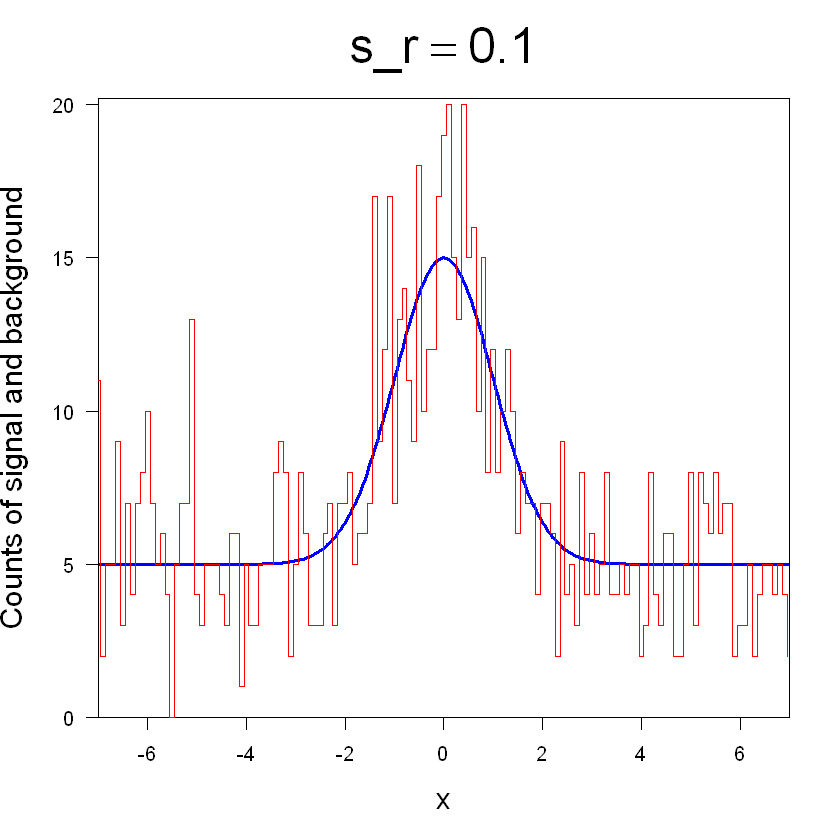

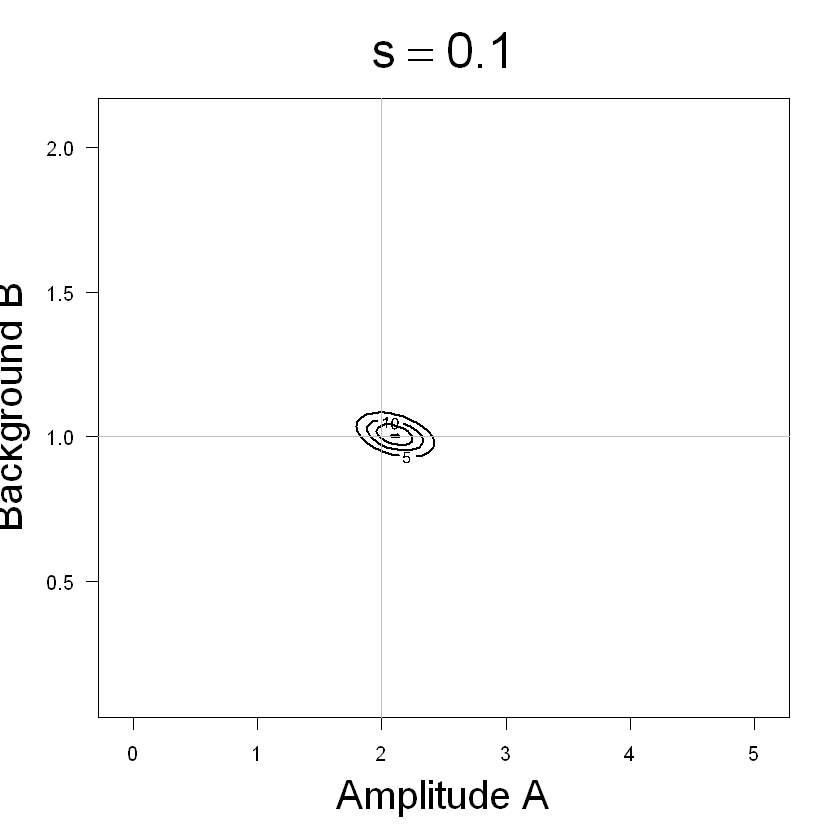

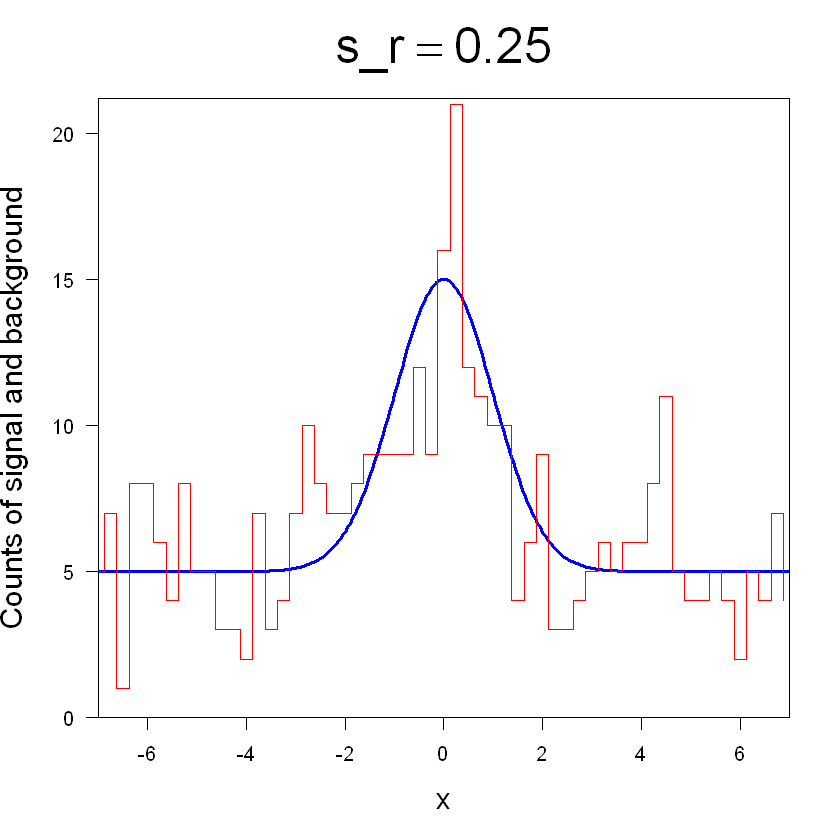

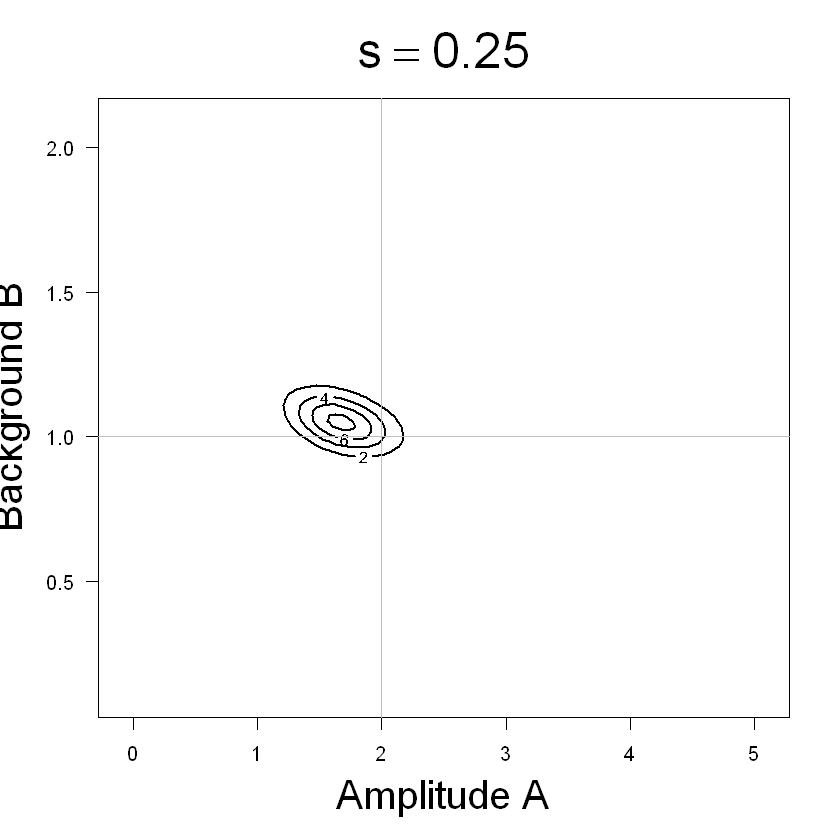

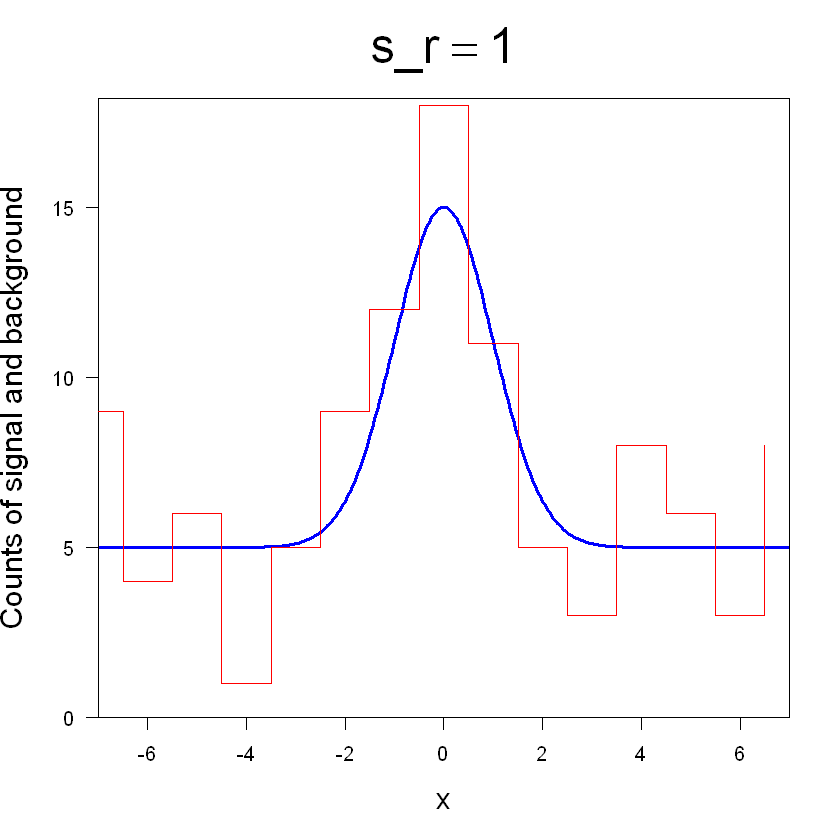

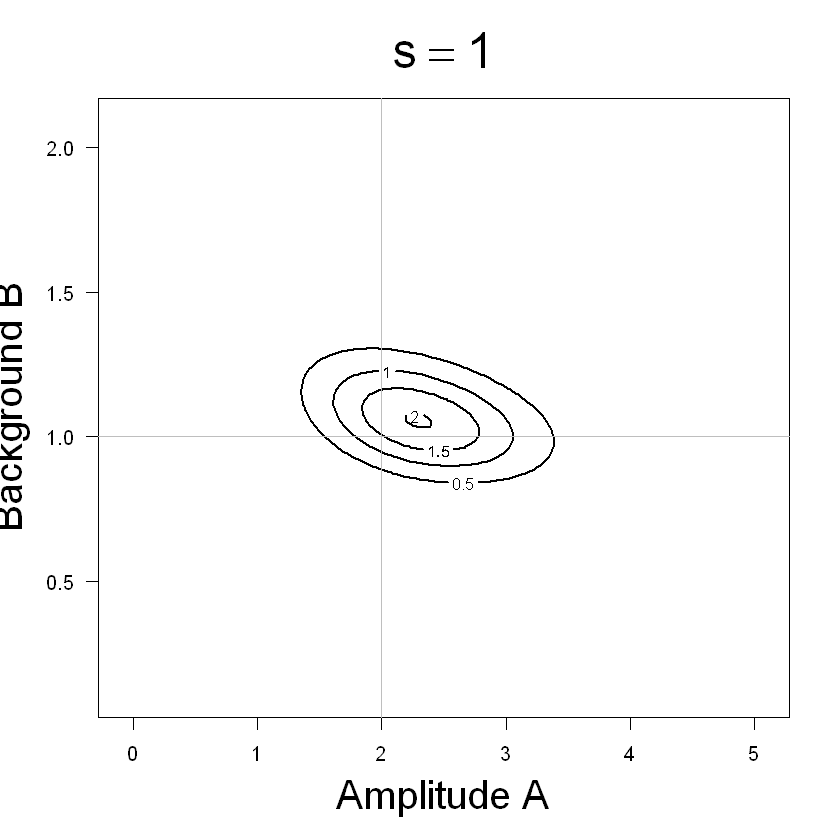

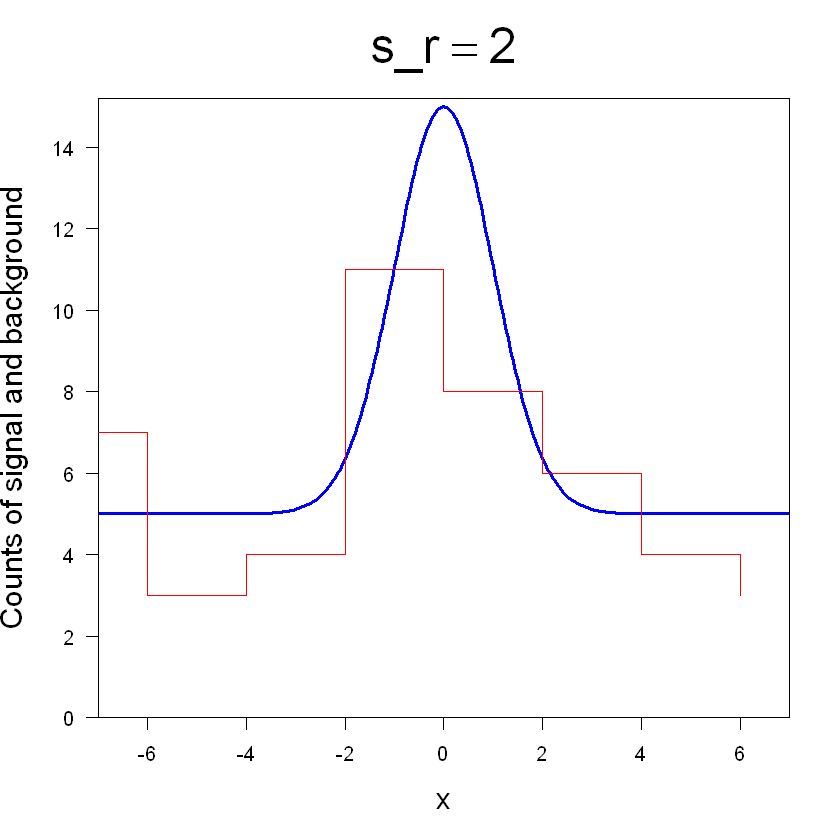

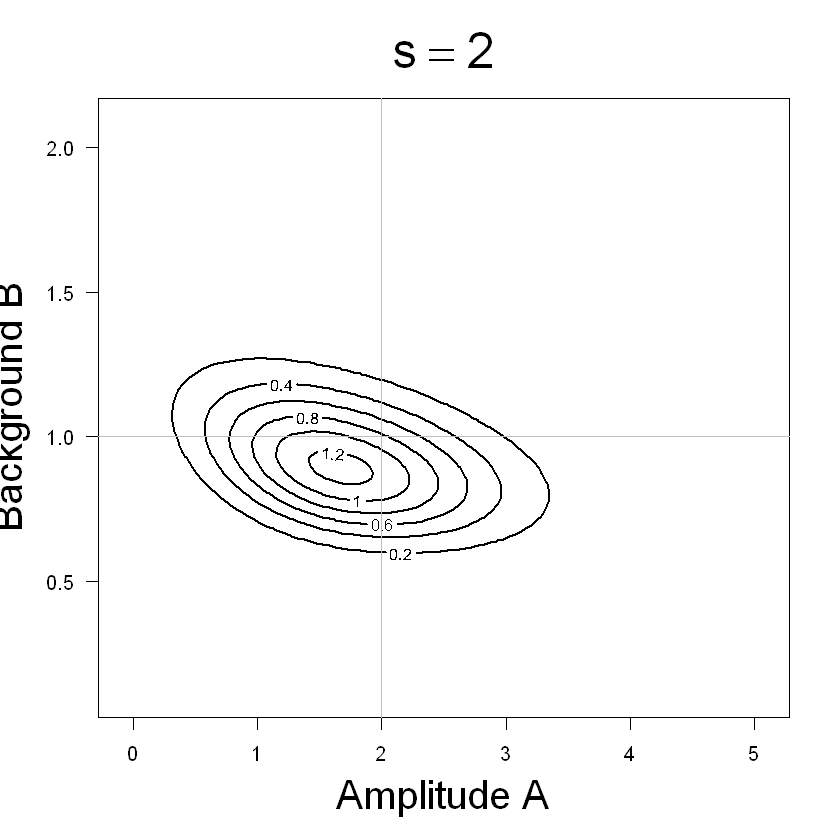

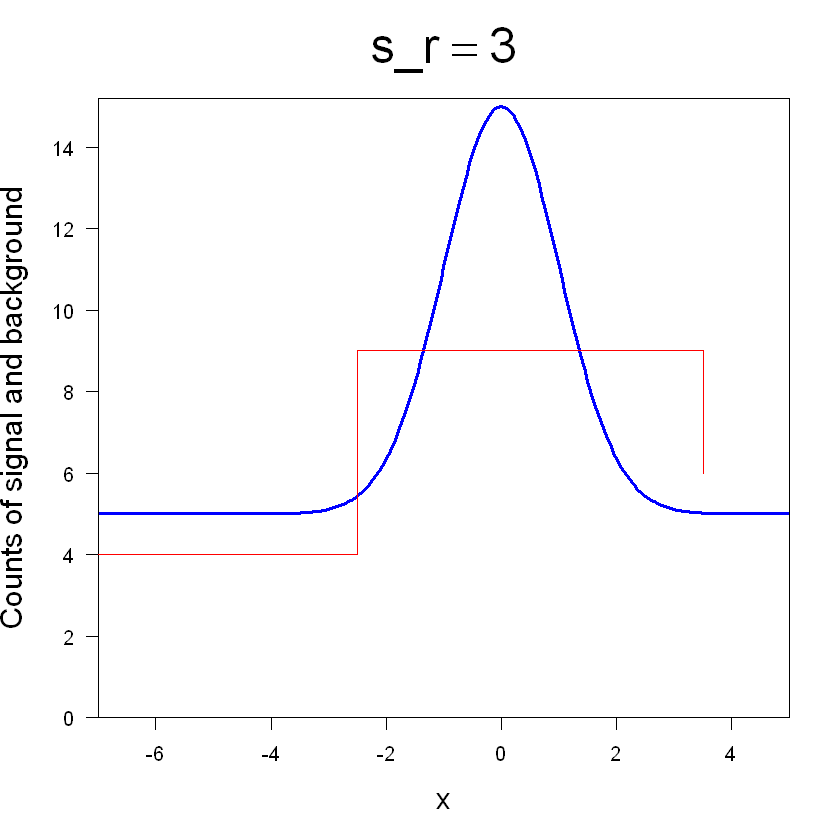

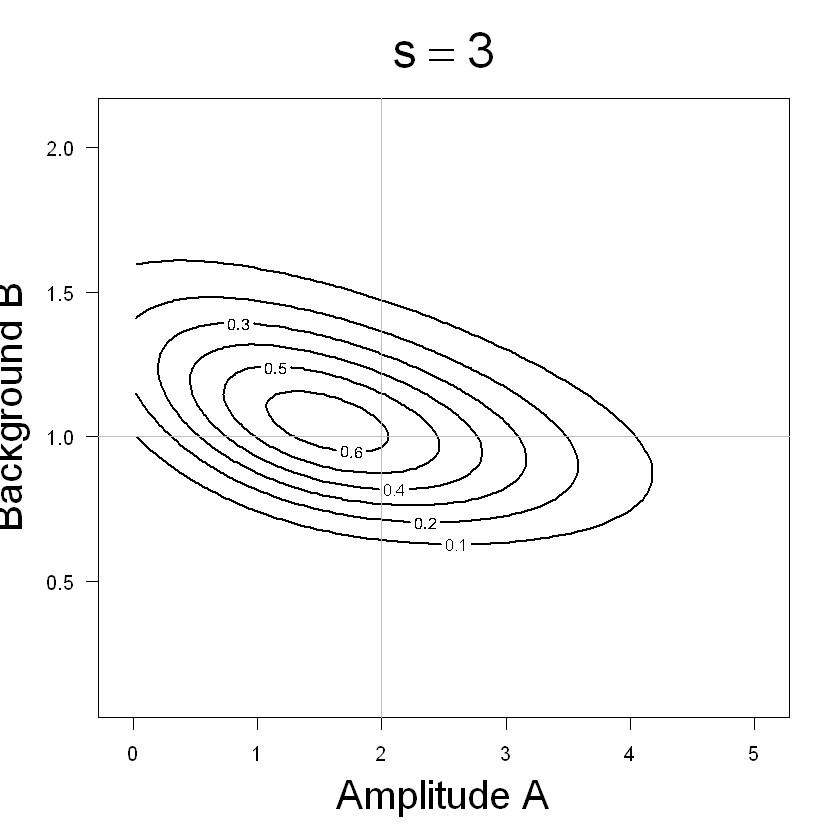

In [5]:
#Generative model
signal <- Vectorize(function(x, A, B, x_0, w, D_t) {
    D_t * ( A*exp((-(x-x_0)^2)/(2*(w^2))) + B )
})

#Logarithm of the posterior
L <- function(d, x, A, B, x_0, w, D_t) {
    if(A<0 || B <0) {return(-Inf)} 
    # the effect of the prior
    sum(dpois(d, lambda=signal(x, A, B, x_0, w, D_t), log=TRUE))
}

#Parameters initialization
A_lim    <- c(0, 5)
B_lim    <- c(0.2, 2)
N_samp   <- 100
Grid <- seq(from=1/(2*N_samp),to=1-1/(2*N_samp), by=1/N_samp)
delta_A <- diff(A_lim)/N_samp
delta_B <- diff(B_lim)/N_samp
A <- A_lim[1] + diff(A_lim)*Grid
B <- B_lim[1] + diff(B_lim)*Grid

x_0 <- 0 
w <- 1  
s_r <- c(0.1, 0.25, 1, 2, 3) #Variable sampling resolution
A_true <- 2 
B_true <- 1 
D_t <- 5 


for (i in 1:length(s_r)){
    xdat    <- seq(from=-7*w, to=7*w, by=s_r[i]*w)
    s_true <- signal(xdat, A_true, B_true, x_0, w, D_t)
    ddat   <- rpois(length(s_true), s_true)
    
    xplot <- seq(from=min(xdat), to=max(xdat), by=0.05*w)
    splot <- signal(xplot, A_true, B_true, x_0, w, D_t)
    xdat_off <- xdat-(s_r[i]/2)
    
    plot(xplot, splot, xlab="x", ylab="Counts of signal and background",
         xaxs='i', yaxs='i', type='l', lwd = 3, 
         ylim=c(0, max(ddat, splot)+0.2), 
         col = 'blue', main=parse(text = paste0('s_r == ', s_r[i])),
         cex.main=2.5, cex.lab=1.5, las=1) 
    lines(xdat_off, ddat, type='s', col='red', xlab="", ylab="")
    
    #Logarithm of not normalized posterior
    z <- matrix(data=NA, nrow=length(A), ncol=length(B))
    fill_matrix <- function(A, B){ L(ddat, xdat, A, B, x_0, w, D_t) }
    z <- outer(A, B, Vectorize(fill_matrix))
    z <- z - max(z) 
    norm <- sum(exp(z))
    norm_z <- exp(z)/(delta_A*delta_B*norm)
    
    contour(A, B, norm_z, nlevels = 5, labcex = 0.8, 
            lwd = 2, las=1, cex.main= 2.5, cex.lab=2,
            xlim=c(min(A)-0.1, max(A)+0.1), ylim=c(min(B)-0.1,max(B)+0.1),
            xlab="Amplitude A", ylab="Background B",
            main=parse(text = paste0('s == ', s_r[i])))
    abline(v=2,h=1,col="grey")
    
}

In [6]:
#By reducing the resolution we obtain a more narrow posterior distribution centered in the true values of A and B,. With fewer data, the posterior is more wide and thus less precise.

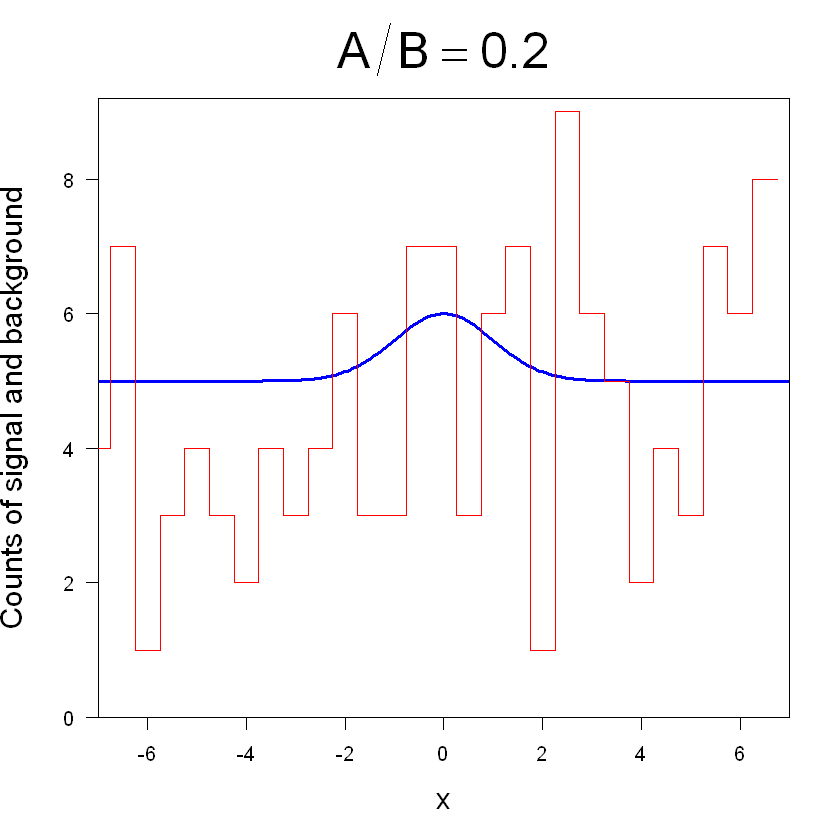

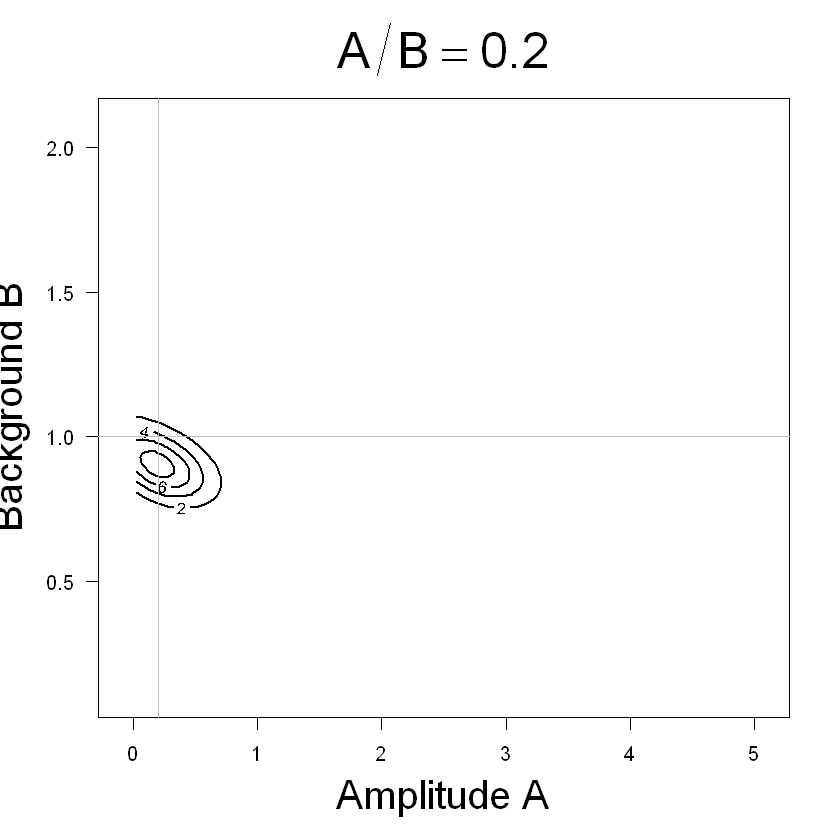

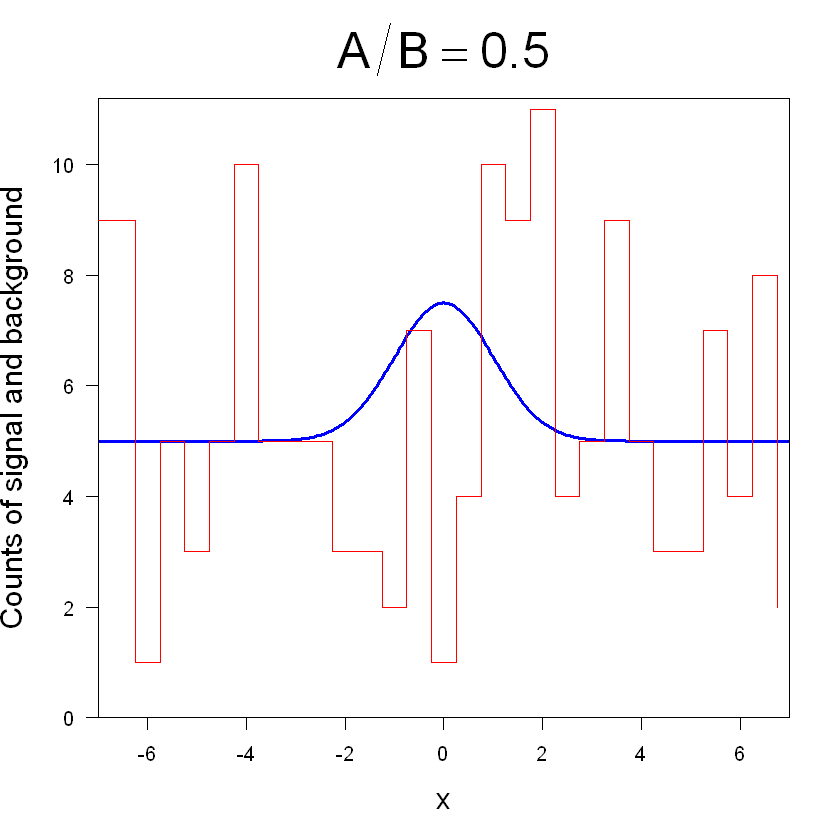

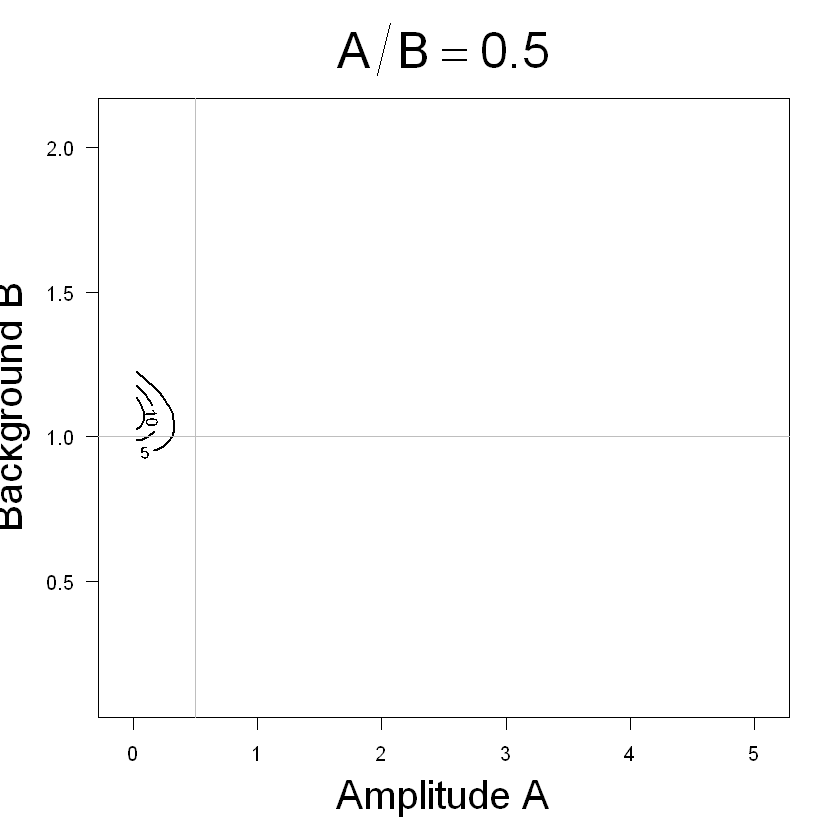

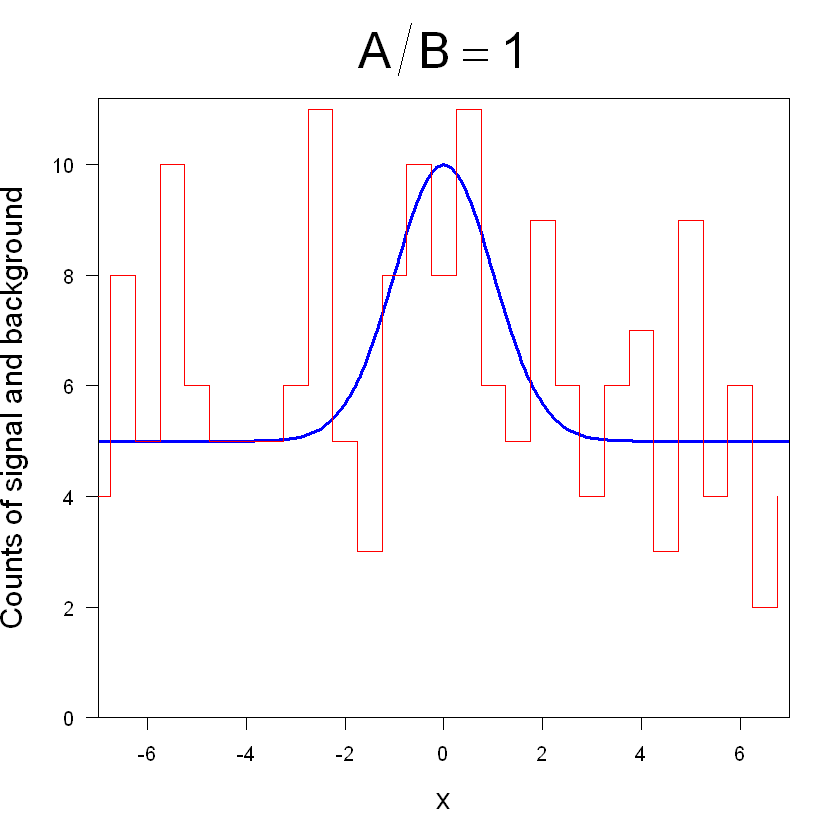

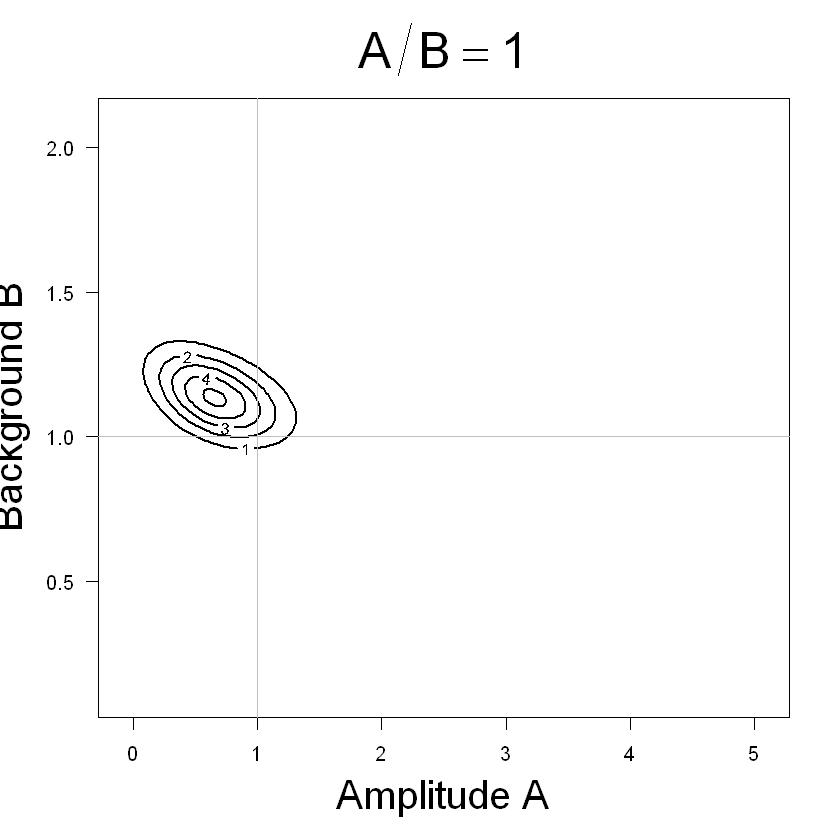

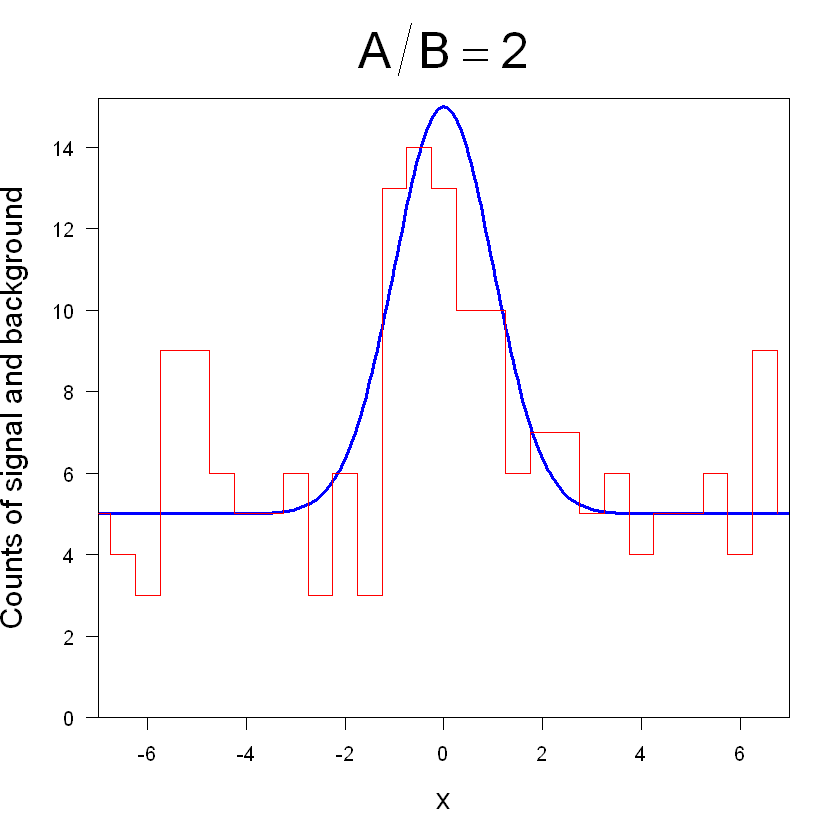

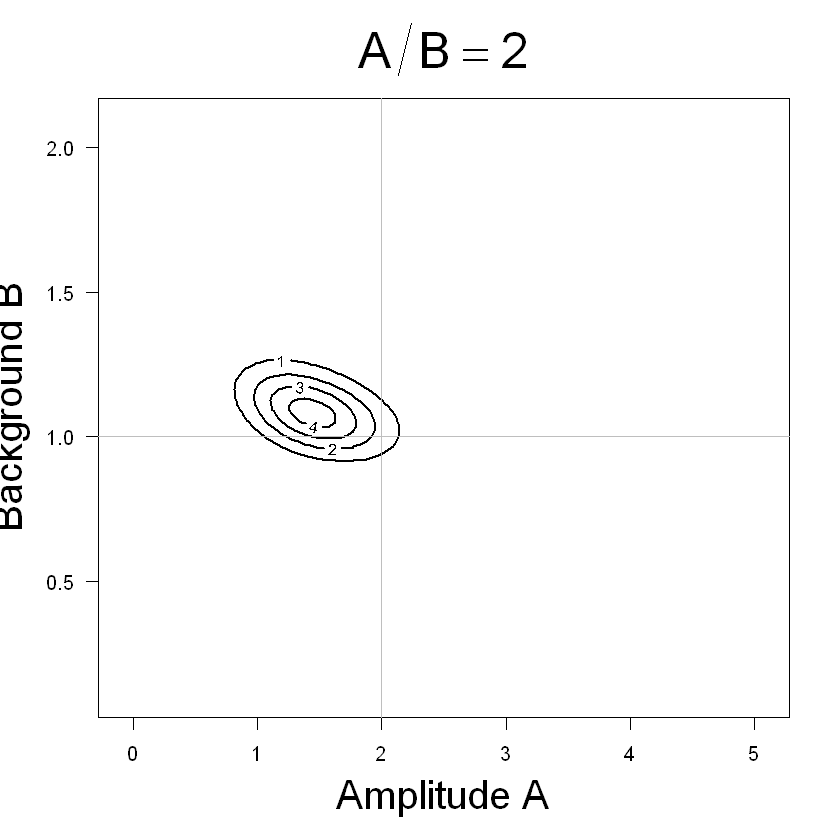

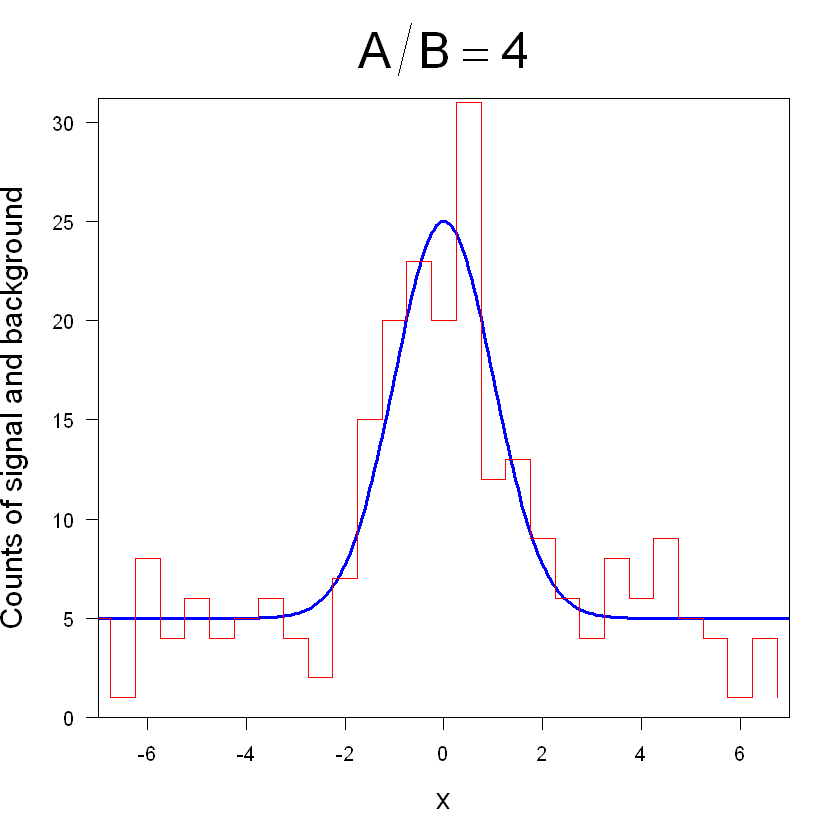

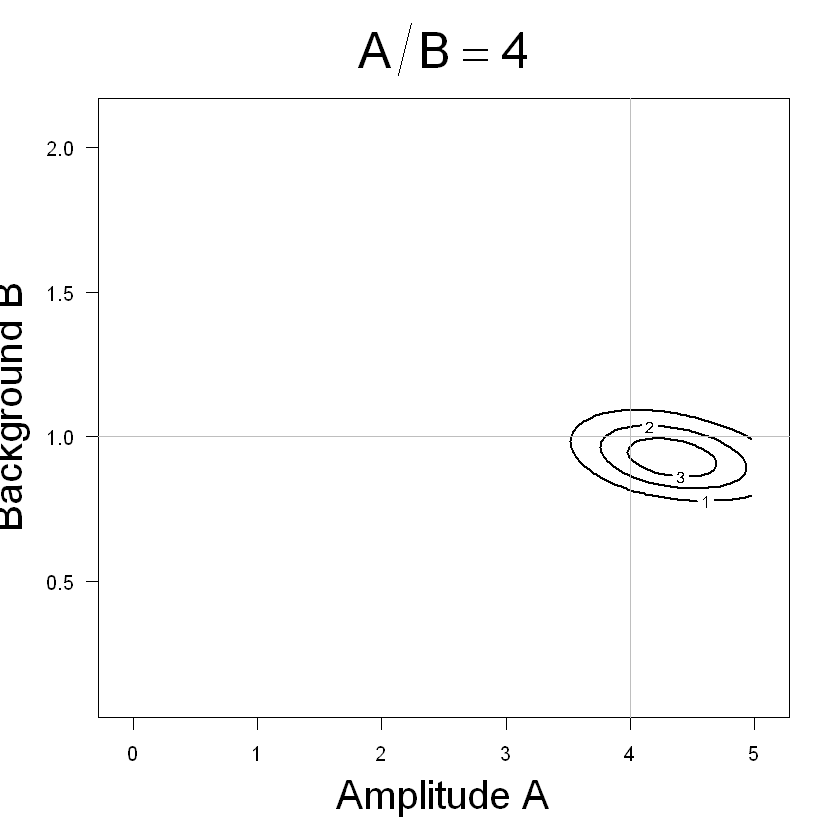

In [7]:
#Parameters initialization
x_0 <- 0      
w <- 1                      
A_true <- c(0.2, 0.5, 1, 2, 4)   
B_true <- 1                      
D_t <- 5                      

for (i in 1:length(A_true)){
    xdat <- seq(from=-7*w, to=7*w, by=0.5*w)
    s_true <- signal(xdat, A_true[i], B_true, x_0, w, D_t)
    ddat <- rpois(length(s_true), s_true)
    
    xplot <- seq(from=min(xdat), to=max(xdat), by=0.05*w)
    splot <- signal(xplot, A_true[i], B_true, x_0, w, D_t)
    xdat_off <- xdat-0.25
    
    plot(xplot, splot, xlab="x", ylab="Counts of signal and background",
         xaxs='i', yaxs='i', type='l', lwd = 3, 
         xlim=range(xplot), ylim=c(0, max(ddat, splot)+0.2),
         col = 'blue', main=parse(text = paste0('A/B == ', A_true[i])),
         cex.main=2.5, cex.lab=1.5, las=1) 
    lines(xdat_off, ddat, type='s', col='red', xlab="", ylab="")
    #Logarithm of not normalized posterior
    z <- matrix(data=NA, nrow=length(A), ncol=length(B))
    fill_matrix <- function(A, B){ L(ddat, xdat, A, B, x_0, w, D_t) }
    z <- outer(A, B, Vectorize(fill_matrix))
    z <- z - max(z)   
    norm <- sum(exp(z))
    norm_z <- exp(z)/(delta_A*delta_B*norm)
    
    contour(A, B, norm_z, nlevels = 5, labcex = 0.8, 
            lwd = 2, las=1, cex.main= 2.5, cex.lab=2,
            xlim=c(min(A)-0.1, max(A)+0.1), ylim=c(min(B)-0.1,max(B)+0.1),
            xlab="Amplitude A", ylab="Background B",
            main=parse(text = paste0('A/B == ', A_true[i])))
    abline(v=A_true[i],h=B_true,col="grey")
    
}

In [8]:
#The increase of signal-to-noise ratio results in a more centered posterior around the true value of the amplitude